In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
%env SM_FRAMEWORK=tf.keras
from bfseg.data.meshdist.dataLoader import DataLoader
from bfseg.utils.losses import ignorant_cross_entropy_loss
from bfseg.utils.metrics import IgnorantAccuracyMetric, IgnorantBalancedAccuracyMetric
import segmentation_models as sm
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 30]

def oneMetricIteration(metric, label, pred):
    # Update FPR, TPR
    metric.update_state(label, pred)
    res = metric.result().numpy()
    metric.reset_states()
    return res



workingdir = "/home/rene/cla_dataset/watershed/"
validationDir ='/home/rene/hiveLabels/'
# Desired image shape. Input images will be cropped + scaled to this shape
image_w = 720
image_h = 480

dataLoader = DataLoader(workingdir, [image_h, image_w],  validationDir = validationDir, validationMode="CLA", batchSize=5)
train_ds, test_ds = dataLoader.getDataset()


env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


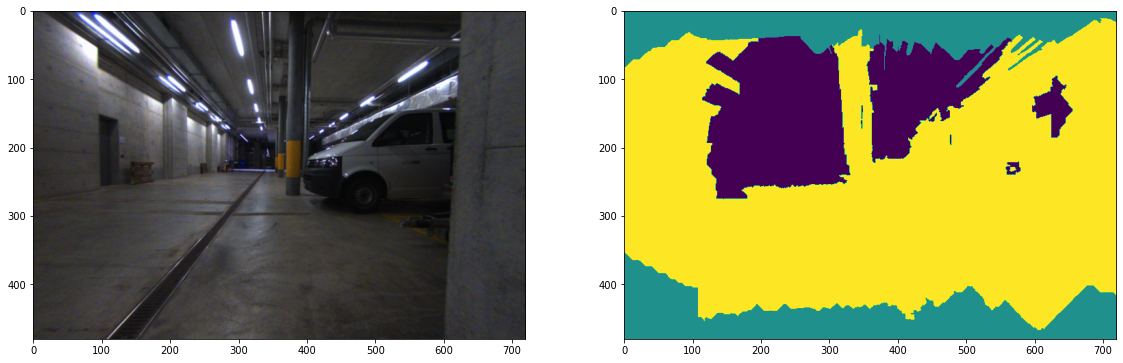

In [10]:
for im,la in train_ds.take(1):
    break;

plt.subplot(1,3,1)
plt.imshow(im[0])
plt.subplot(1,3,2)
plt.imshow(la[0])